<a href="https://colab.research.google.com/github/maderix/covid_analysis/blob/master/notebooks/sklearn_tests_vs_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import urllib
%matplotlib inline

In [106]:
url = 'https://github.com/owid/covid-19-data/blob/master/public/data/testing/covid-testing.xlsx?raw=true'
urllib.request.urlretrieve(url, 'covid-testing.xlsx')
url = 'https://github.com/owid/covid-19-data/blob/master/public/data/ecdc/full_data.csv?raw=true'
urllib.request.urlretrieve(url, 'full_data.csv')

('full_data.csv', <http.client.HTTPMessage at 0x7feff5f012e8>)

In [107]:
df_cases = pd.read_csv('full_data.csv')
df_cases = df_cases.groupby('location', sort=False,as_index='True')['location','total_cases','total_deaths'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [0]:
df_cases = df_cases[df_cases['location'] != 'World']
df_cases = df_cases.rename(columns={'location':'Entity'})

In [109]:
df = pd.read_excel("covid-testing.xlsx","Latest data and source details")
df = df.fillna(0)
for i, row in df.iterrows():
    df.loc[i,"Entity"] = df.loc[i,"Entity"].split(' -')[0]
#Add the testing data from previous dataframe here
df = df.merge(df_cases)
df = df.drop_duplicates(subset='Entity', keep="first")
df[df['Entity'] == 'India']

,Entity,Date,Source URL,Source label,Notes,Cumulative total,Cumulative total per thousand,Daily change in cumulative total,Daily change in cumulative total per thousand,3-day rolling mean daily change,3-day rolling mean daily change per thousand,General source label,General source URL,Short description,Detailed description,total_cases,total_deaths
21,India,2020-04-14,https://github.com/datameet/covid19,Indian Council of Medical Research,Made available by DataMeet on Github,229426,0.166,26875.0,0.019,21551.0,0.016,Indian Council of Medical Research,https://github.com/datameet/covid19,The number of people tested.,The ICMR reports separate figures for both “sa...,11438,377


In [0]:
x_axis = 'total_deaths'
x1_axis = 'total_cases'
y_axis = 'Cumulative total'

In [0]:
#apply clean-up rules
df = df[df[x_axis] > 0]
#df = df[df['total_covid19_confirmed_cases'] > 10]
#df = df[df['Cumulative_total_tests'] < 1000000]
#df = df[df['Cumulative_total_tests'] > 5000]
df = df.sort_values(by=x_axis,ascending=False)

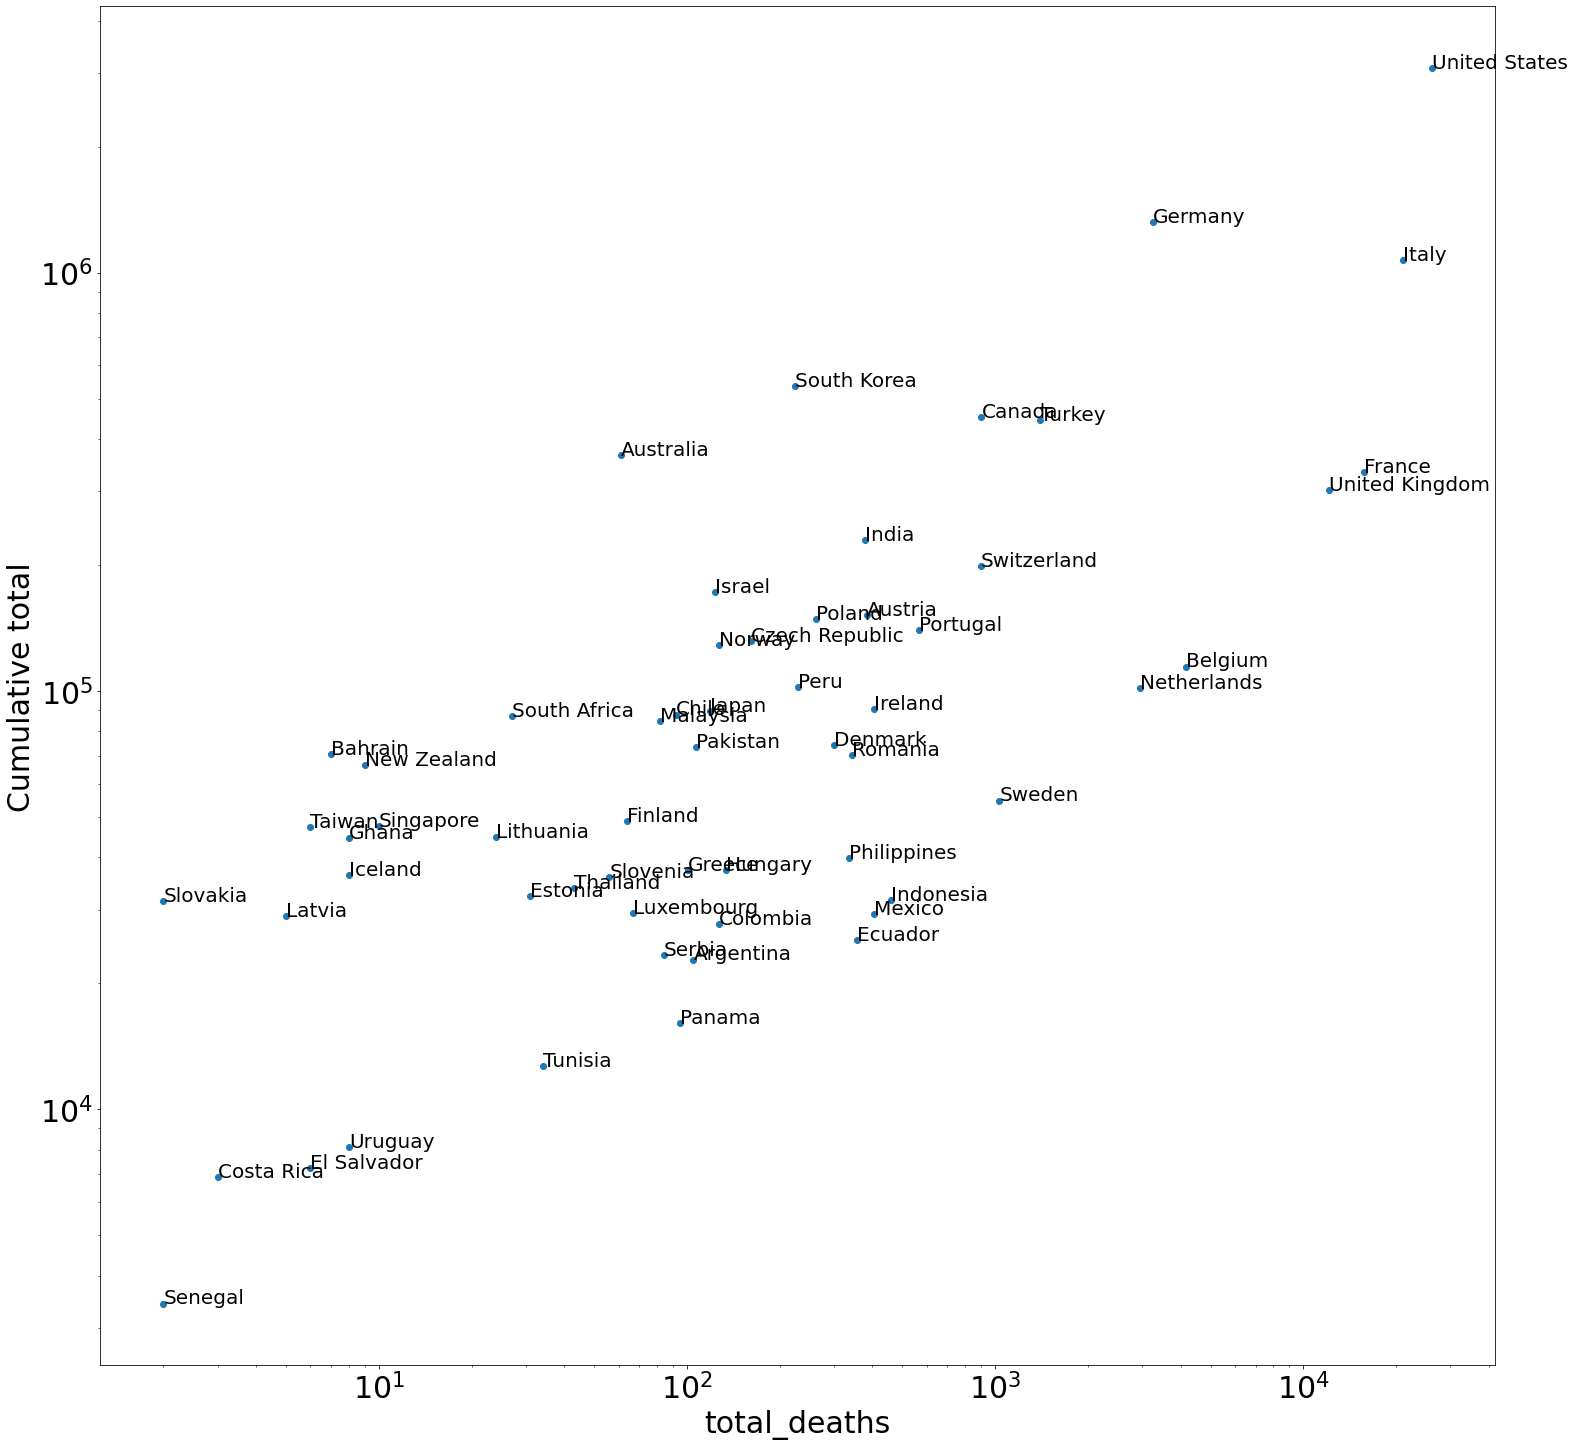

In [133]:
def label_point(x, y, val, ax,x_axis,y_axis,bb=False,color='green'):
    a = pd.concat({x_axis: x, y_axis: y, 'Entity': val}, axis=1)
    for i, point in a.iterrows():
        if bb:
            ax.text(point[x_axis], point[y_axis],str(point['Entity']),fontsize=20, bbox=dict(facecolor=color, alpha=0.6))
        else:
            ax.text(point[x_axis], point[y_axis],str(point['Entity']),fontsize=20)
        
def draw_graph(df,x_axis,y_axis,bbox=False,fig_size=(25,25),scale='log',color='green'):
    ax = df.set_index(x_axis)[y_axis].plot(style='o',
                                           figsize=fig_size,
                                           #yticks=[100,1000,10000,100000,1000000],
                                           #xticks=[1000,10000,100000,1000000]
                                             )
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    ax.set_yscale(scale)
    ax.set_xscale(scale)
    label_point(getattr(df,x_axis), getattr(df,y_axis), df.Entity, ax, x_axis,y_axis,bbox,color=color)
    return ax
    #plt.loglog(Y,X,color='red')
    #plt.savefig('covid.png')
    
draw_graph(df,x_axis,y_axis)

In [113]:
X_train = df[[x_axis, x1_axis]].to_numpy()
Y_train = df[y_axis].to_numpy()
X_train = np.reshape(X_train,(-1,2))
Y_train = np.reshape(Y_train,(-1,1))
print(X_train.shape, Y_train.shape)

(58, 2) (58, 1)


In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
Y_train_pred = reg.predict(X_train)

In [127]:
print(Y_train_pred)

[[3251160.88109309]
 [ 742817.35943584]
 [ 468685.1900025 ]
 [ 456615.49372942]
 [ 191889.30396283]
 [ 757030.73410526]
 [ 185241.01743589]
 [ 420395.52752768]
 [ 116508.92832761]
 [ 207714.22859512]
 [ 200321.24644911]
 [ 156617.80420395]
 [  85472.63312524]
 [ 124262.7767103 ]
 [  89329.12244939]
 [ 140357.29917309]
 [ 124376.7998661 ]
 [ 102607.37799019]
 [  98580.12040097]
 [  89173.79130208]
 [  97008.19078022]
 [ 101412.42716728]
 [ 119627.55553743]
 [ 121342.58266678]
 [  96545.88641451]
 [  70659.63984643]
 [  78787.95851293]
 [  99397.6653935 ]
 [ 130932.13963119]
 [ 108307.95843085]
 [  96317.77031364]
 [  75910.28913863]
 [  74453.14450032]
 [  82592.39081701]
 [ 107581.98686416]
 [  85482.91607815]
 [  90867.73325466]
 [  81395.83825459]
 [  80593.13595023]
 [  99331.44649807]
 [  69537.23679077]
 [  77870.03589661]
 [  67084.7467611 ]
 [  70717.69924118]
 [  76752.90413515]
 [  69061.14731454]
 [  81766.96255325]
 [  69287.93790533]
 [  66760.40818831]
 [  72988.71102036]


In [116]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=4, random_state=0)
reg.fit(X_train, Y_train)
Y_train_pred = reg.predict(X_train)
print(Y_train_pred)

[2234557.952      1216154.65225     506351.73253086  362118.16141975
  245447.14482323  974536.54761905  210154.84815656  339610.94855395
  172454.07570992  256889.66347497  210867.79914759  163088.63207367
   39821.83036306  155175.9278233    43194.81434865  164826.44707367
  159655.90851594  110098.70434454  115688.63736041   44517.62577722
  115593.34238294  122351.84172477  193716.08399641  318780.51795757
  128923.02149263   38528.66853447   38411.83228447  135285.04315475
  221947.60632872  129500.19144375  104699.13824771   38565.8124928
   38565.8124928    38423.0149928   131902.37877708   38423.0149928
   49189.26332673   39460.07667376   39636.29700709  212254.56899595
   39560.36867376   39636.29700709   32789.12144492   39560.36867376
   41575.58528181   40632.83703578   42134.33037391   41575.38412788
   32688.06646075   42134.33037391   27059.47459653   42444.73704058
   27059.47459653   22735.45179104   33604.62644884   26446.3699026
   36137.90610504   22296.40259984]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [150]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,Y_train)
Y_train_pred = clf.predict(X_train)
print(Y_train_pred)

[3081620 1073689  333807  302599  114367 1317887  101534  443626   54700
  450717  199000  140040   31628   90646   29299  151796  229426   25347
   70097   39898   74210  148321  102216  534552  131542   37326   27685
  128569  172063   89551   73439   22805   37344   16053   87794   23398
   84791   29523   48828  366493   35946   33810   12675   32263   87022
   44677   47486   66499   44421   36339    8114   70813   47215    7230
   29018    6872   31491    3434]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


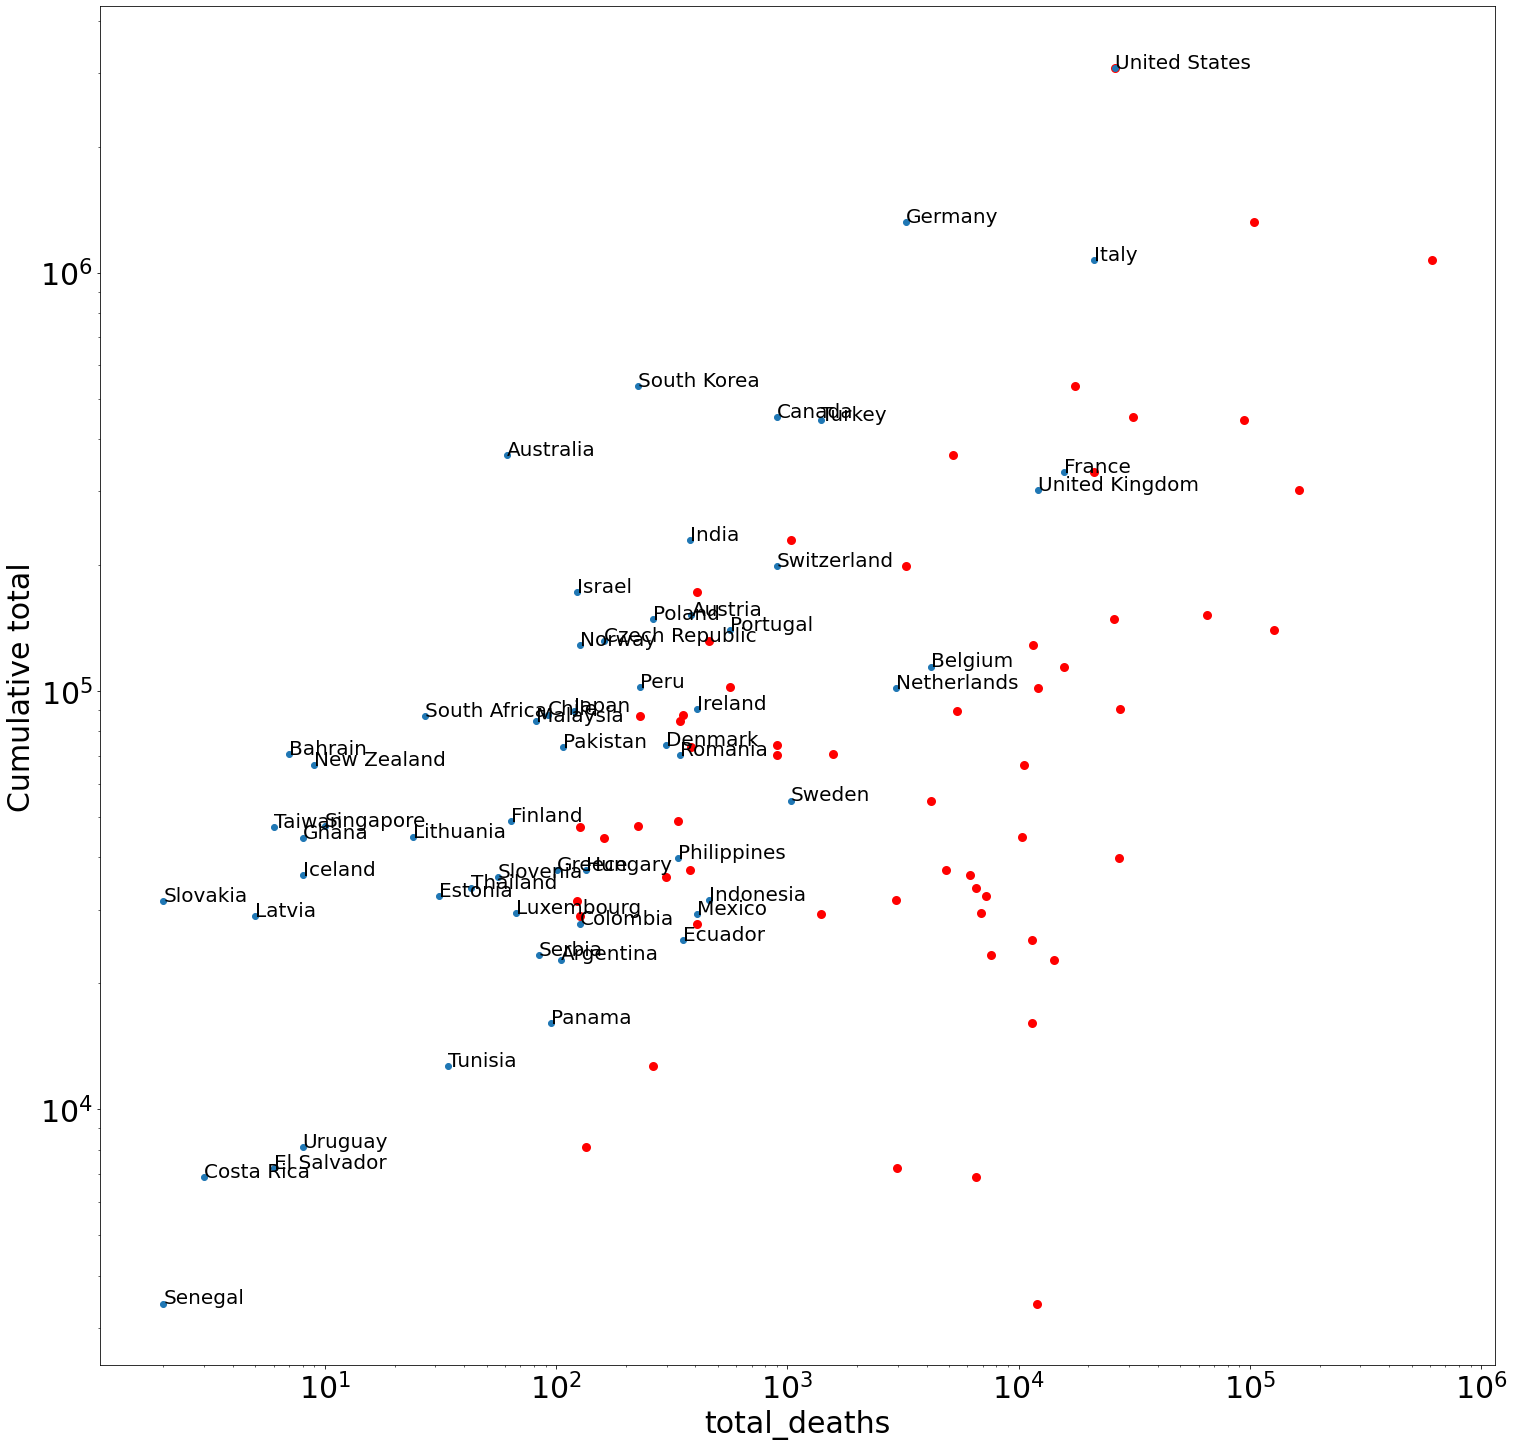

In [152]:
#df = df[:20]
#df = df.sample(20)
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rc('figure', titlesize=35)  # fontsize of the figure title

ax = draw_graph(df,x_axis,y_axis,False,scale='log',color='blue')
plt.scatter(X_train.reshape(2,-1)[0],Y_train_pred,color='red',linewidth=3)
plt.savefig('covid.png')